In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
print(visits.info())
print(visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   996969

In [4]:
visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'}, inplace=True)
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y.%m.%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y.%m.%d %H:%M:%S")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [5]:
print(orders.info())
print(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [6]:
orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
print(costs.info())
print(costs.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [8]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Limpieza de datos: no hay datos faltantes solo cambie el nombre de las columna para que sea mas fácil hacer de recordar y cambie el tipo a las columnas de fechas

# ¿Cuántas personas lo usan cada día, semana y mes?

In [9]:
# crear columna para el año, el mes, la semana y el dia
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date
visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [10]:
# calculamos dau (Daily Active Users), wau (Weekly Active Users), y mau (Monthly Active Users)
dau = (
    visits.groupby('session_date')
    .agg({'uid': 'nunique'})
    .mean().round()
)
wau = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean().round()
)
mau = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean().round()
)


print('personas que visitan al dia: ', dau.values[0])
print('personas que visitan a la semana: ', wau.values[0])
print('personas que visitan al mes: ', mau.values[0])


personas que visitan al dia:  908.0
personas que visitan a la semana:  5622.0
personas que visitan al mes:  23228.0


Text(0, 0.5, 'cantidad de persona')

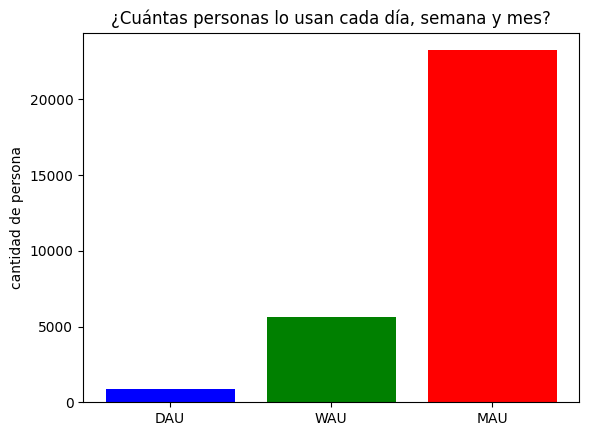

In [11]:
nombres = ['DAU', 'WAU', 'MAU']
valores = [dau.values[0], wau.values[0], mau.values[0]]
plt.bar(
    nombres,
    valores,
    color=['blue', 'green', 'red']
)
plt.title('¿Cuántas personas lo usan cada día, semana y mes?')
plt.ylabel('cantidad de persona')

# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [12]:
# condamos cuantes sesiones hay independientemente si son del mismo usuario
sessions_per_day = (
    visits.groupby('session_date')
    .agg({'uid': 'count'})
    .mean().round()
    )

print('sessiones diarias: ', sessions_per_day.values[0])

sessiones diarias:  987.0


# ¿Cuál es la duración de cada sesión?

<AxesSubplot:>

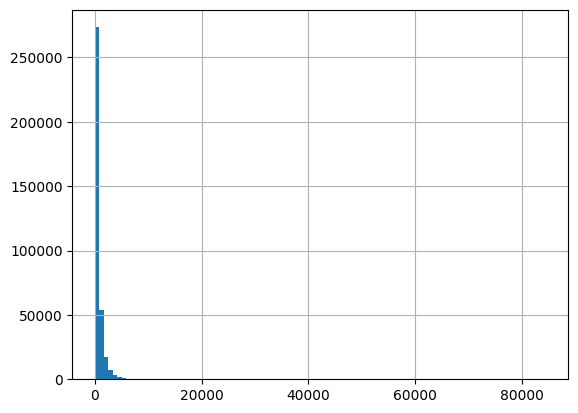

In [13]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].hist(bins=100)

In [14]:
asl = visits['session_duration'].mode()
print('duracion de las sessiones en segundos: ', asl.values[0])

duracion de las sessiones en segundos:  60


Dado que la gran mayoría de las sesiones duran poco no se toma el promedio usamos la moda que es este caso seria de un minuto.

# ¿Con qué frecuencia los usuarios regresan?

In [15]:
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date, on='uid')

los clientes regresan des pues de: 3.0 minutos


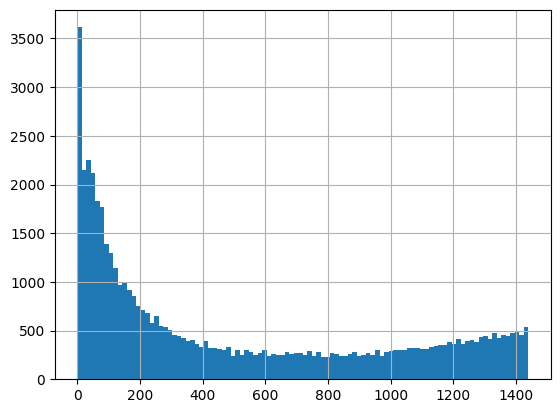

In [16]:
visits_sec = visits[visits['start_ts'] != visits['first_visit_date']].copy()
visits_sec['tiempo'] = ((visits_sec['start_ts'] - visits_sec['first_visit_date']).dt.seconds) / 60

visits_teimpo_min = visits_sec.groupby('uid')['tiempo'].min()
visits_teimpo_min.hist(bins=100)
print(f'los clientes regresan des pues de: {visits_teimpo_min.mode().values[0]} minutos' )

Después de la primera visita la segunda suele darse a los 3 minutos 

# ¿Cuándo empieza la gente a comprar?

In [17]:
orders_ = orders.join(first_visit_date, on='uid')
orders_.head(5)

,buy_ts,revenue,uid,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


In [18]:
#agrupar por primera compra y unir con la primera visista a la pagina
first_order = orders_.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'
orders_ = orders_.join(first_order, on='uid')
orders_.head(5)


,buy_ts,revenue,uid,first_visit_date,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00


In [19]:
# hacer cohortes
orders_min = orders_[orders_['buy_ts'] == orders_['first_order']].copy()
orders_min['first_visit_month'] = orders_min['first_visit_date'].dt.to_period('M')
orders_min['horas'] = (((orders_min['first_order'] - orders_min['first_visit_date']).dt.seconds) // 3600)

orders_min.head(5)

,buy_ts,revenue,uid,first_visit_date,first_order,first_visit_month,horas
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,2017-06,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,2017-06,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,2017-06,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,2017-06,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,2017-06,0


<AxesSubplot:title={'center':'horas hasta la primera compra'}, xlabel='horas', ylabel='first_visit_month'>

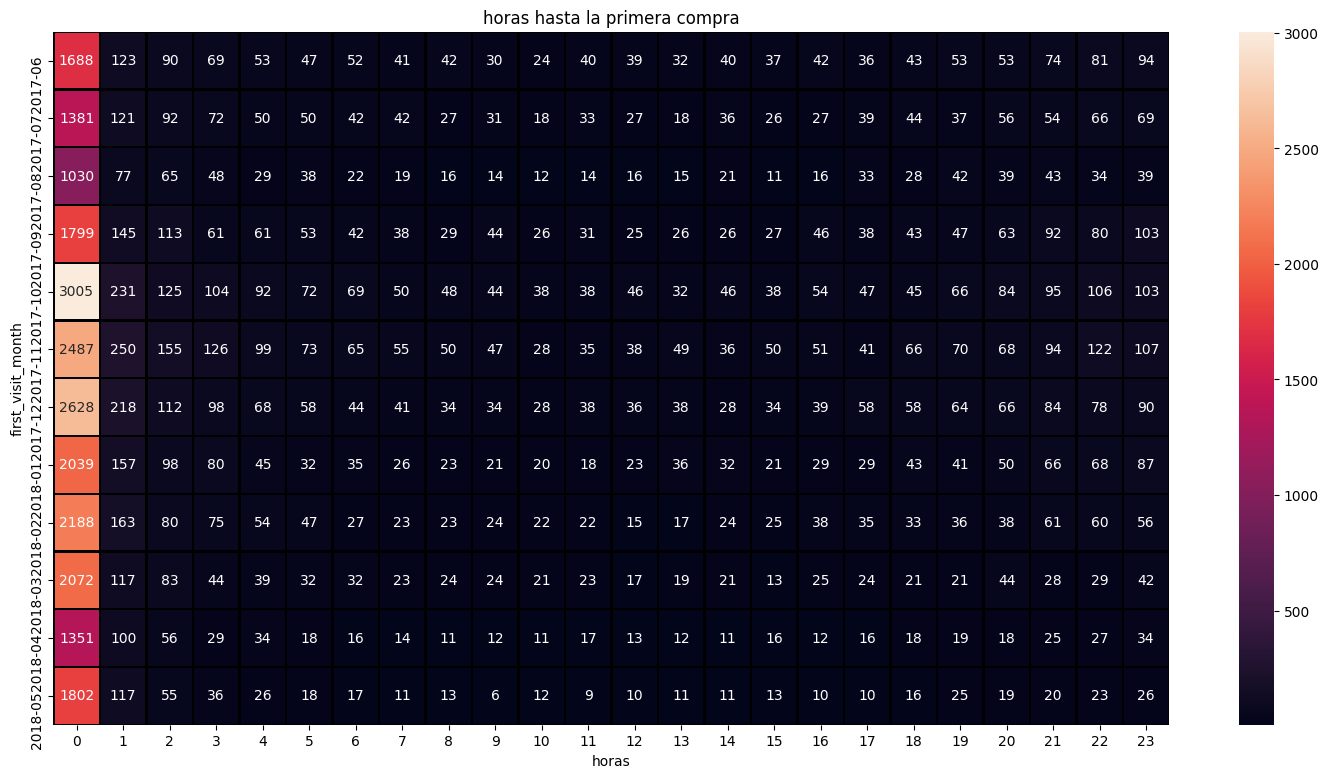

In [20]:
orders_pivot = orders_min.pivot_table(
    index='first_visit_month',
    columns='horas',
    values='uid',
    aggfunc='count'
)
plt.figure(figsize=(18, 9))
plt.title('horas hasta la primera compra')
sns.heatmap(
    orders_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black'
)

Como vemos en el mapa de calor la primera compra independientemente de la cohorte se da antes de una hora después de la primera visita, y todas son el primer dia.

# ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [21]:
orders_['first_order_month'] = orders_['first_order'].dt.to_period('M')
orders_['order_month'] = orders_['buy_ts'].dt.to_period('M')
orders_.head(5)

,buy_ts,revenue,uid,first_visit_date,first_order,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,2017-06,2017-06


<AxesSubplot:title={'center':'Compras por mes'}, xlabel='order_month', ylabel='first_order_month'>

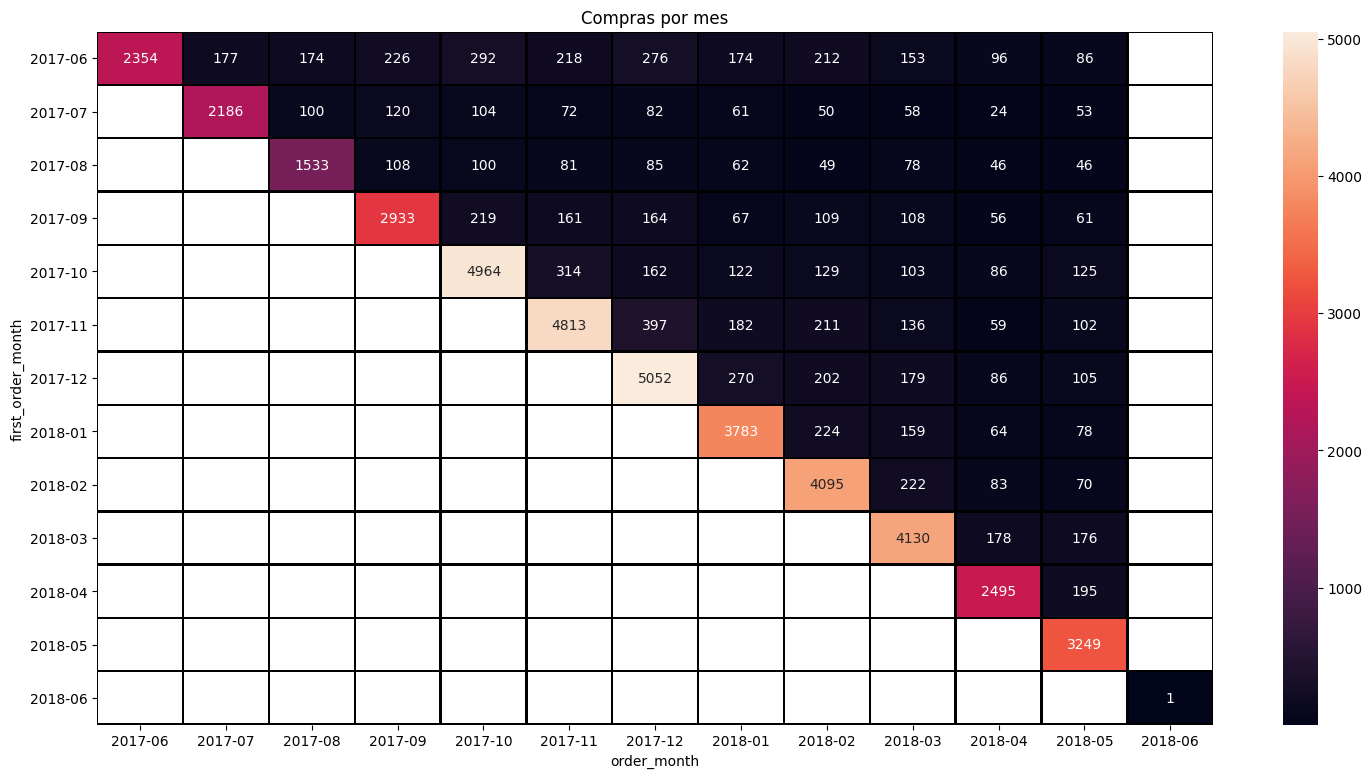

In [22]:
orders_per_month = orders_.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='count'
)
plt.figure(figsize=(18, 9))
plt.title('Compras por mes')
sns.heatmap(
    orders_per_month,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black'
)

Los pedidos son abundantes el primer mes de cada no importa la cohorte, despues de eso los pedidos bajan el segundo mes es mucho menos que el primero, del 3er mes en adelante las ventas se mantienen entre 50 y 200  pedidos.

# ¿Cuál es el tamaño promedio de compra?

<AxesSubplot:title={'center':'tamaño promedio de compra'}, xlabel='order_month', ylabel='first_order_month'>

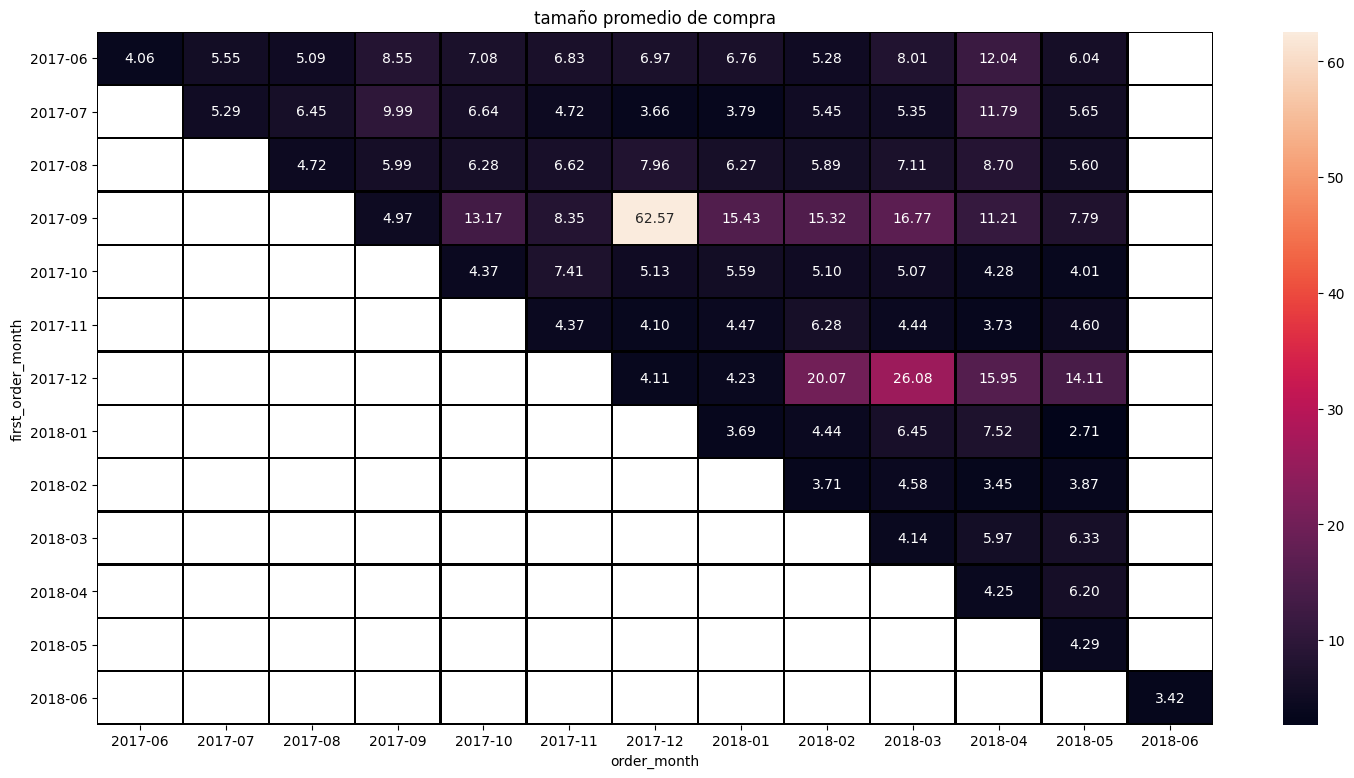

In [23]:
mean_revenue = orders_.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue',
    aggfunc='mean'
)
plt.figure(figsize=(18, 9))
plt.title('tamaño promedio de compra')
sns.heatmap(
    mean_revenue,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black'
)

In [24]:
order_mean_revenue = orders_['revenue'].mean().round()
print(f'el valor de la compra promedio es de: {order_mean_revenue}')

el valor de la compra promedio es de: 5.0


El promedio general es de 5, en el mapa de calor podemos ver como que el mayor promedio se dio en el cohorte de septiembre de 2017 el mes de diciembre de 2017 en el que el promedio llego hasta 62.57, lo cual es digno de mención.

# ¿Cuánto dinero traen? (LTV)

In [25]:
first_orders = first_order.reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

first_visits = first_visit_date.reset_index()
first_visits.columns = ['uid', 'first_visit_ts']
first_visits['first_visit_dt'] = first_visits['first_visit_ts'].dt.date
first_visits['first_visit_month'] = first_visits['first_visit_ts'].astype('datetime64[M]')

buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_visit_dt'] = pd.to_datetime(buyers['first_visit_dt'])
buyers.head()



,uid,first_visit_ts,first_visit_dt,first_visit_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [26]:
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')


In [27]:
# calcular tamaño de las cohorte 
cohort_sizes = (
    buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head(12)
#cohort_sizes.plot(kind='bar')

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [28]:
# cohortes
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()
cohorts['age'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
cohorts.head()
#

,first_order_month,order_month,revenue,age
0,2017-06-01,2017-06-01,9557.49,0.0
1,2017-06-01,2017-07-01,981.82,1.0
2,2017-06-01,2017-08-01,885.34,2.0
3,2017-06-01,2017-09-01,1931.30,3.0
4,2017-06-01,2017-10-01,2068.58,4.0


In [29]:

#unimos cohort_sizes y cohorts
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
#calculamos edad

# calculamos ltv
report['ltv'] = report['revenue'] / report['n_buyers']
# tabla dinamica
result = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='sum'
).round(2)
result = result.fillna('')

result

age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


El primer mes en cualquier cohorte hay un alto ltv después baja la mayoría esta por debajo de 1, esto tiene sentido tomando en cuenta datos los mapas de calor anteriores

# Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [30]:
total_costs = costs['costs'].sum()
print(f'costos totales: {total_costs}')

costos totales: 329131.62


In [31]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head(5)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


<AxesSubplot:xlabel='month'>

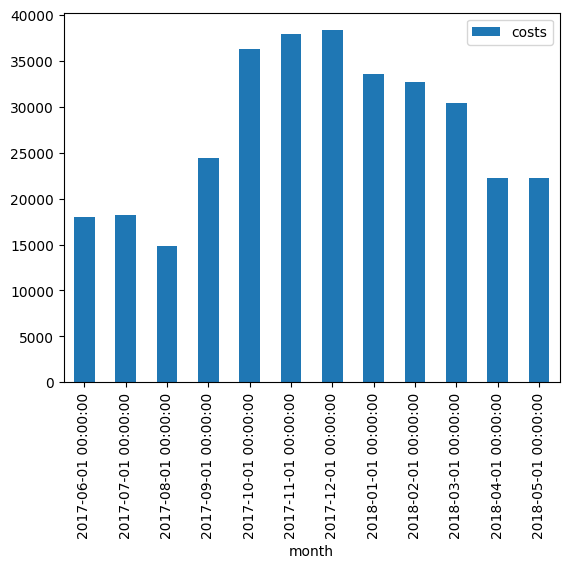

In [32]:
#costo mensual
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs.plot(x='month', y='costs', kind='bar')


Los gastos aumentaron a partir de septiembre empezaron a bajar en enero y se estabilizaron en abril, esto también coincide con el aumento de clientes.

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


<AxesSubplot:xlabel='source_id'>

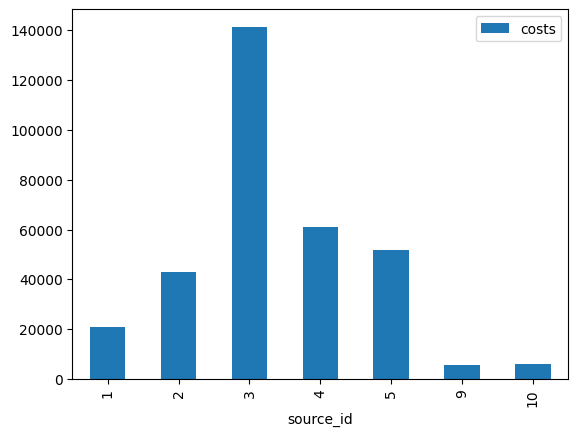

In [33]:
#costo por fuente
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()
print(source_costs)
source_costs.plot(x='source_id', y='costs', kind='bar')

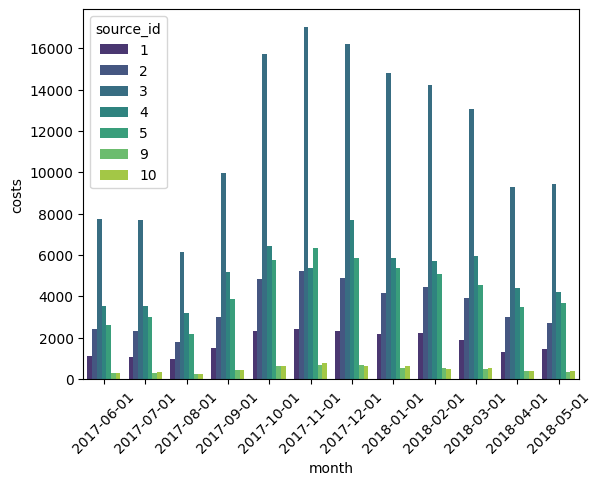

In [34]:
#costo por mes y fuente de adquisicion
monthly_source_costs = (
    costs.groupby(['month', 'source_id'])
    .agg({'costs': 'sum'})
    .reset_index()
    )
monthly_source_costs['month'] = monthly_source_costs['month'].astype(str)
sns.barplot(
    data=monthly_source_costs,
    x='month',
    y='costs',
    hue='source_id',
    palette='viridis',
)
plt.xticks(rotation=45)
plt.show()

In [35]:
#no entiendo por que la leyenda sale mal pero los datos son correctos
print(monthly_source_costs['source_id'].unique())

[ 1  2  3  4  5  9 10]


costos totales: 329131.62.

La fuente en la que más se gasto es la 3 por un amplio margen.

Los gastos aumentaron a partir de septiembre empezaron a bajar en enero y se estabilizaron en abril.


# ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [36]:
#cac por medio
print("CAC medio es:", round(costs['costs'].sum() / orders['uid'].nunique(), 2))

CAC medio es: 9.01


In [37]:
buyers_monthly = buyers.groupby('first_order_month').agg({'uid': 'nunique'})


,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


<AxesSubplot:title={'center':'CAC promedio por mes'}, xlabel='Mes', ylabel='c.u.'>

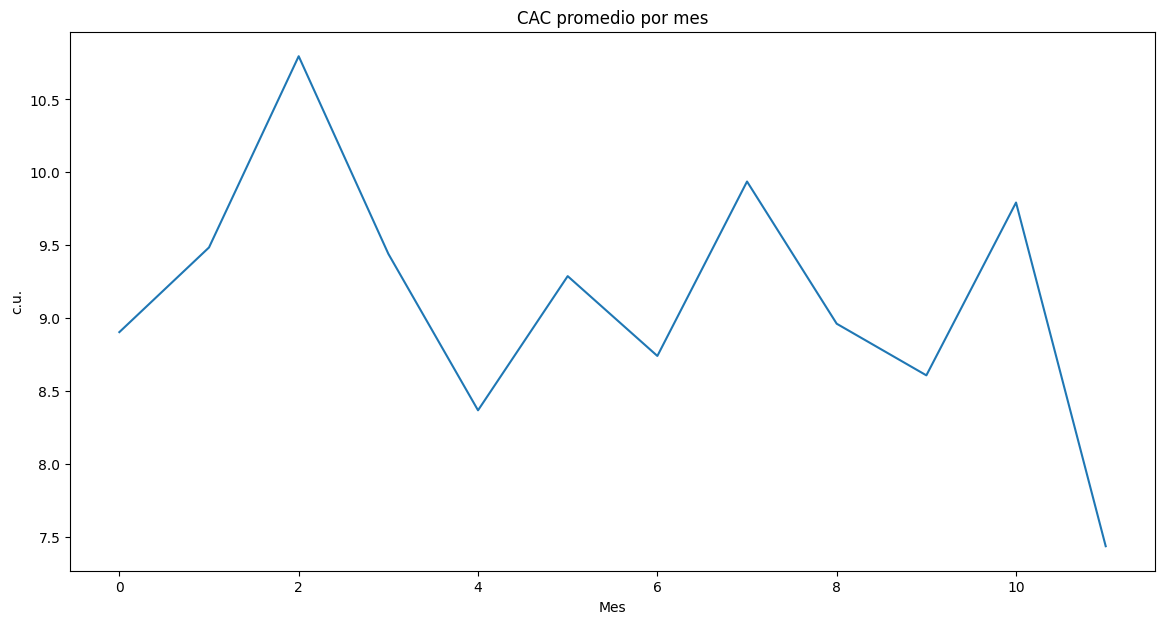

In [38]:
cac_month = pd.merge(monthly_costs,
                    buyers_monthly,
                      left_on='month', right_on='first_order_month')
cac_month['cac'] = cac_month['costs']/cac_month['uid']
                  
cac_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')

In [39]:
# encontrar la primera fuente de cada visitanet
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, on='uid')
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
buyers_daily.head()


,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [48]:
# cac diario por fuente
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']
costs_.head()

,source_id,first_order_dt,n_buyers,dt,costs,month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111


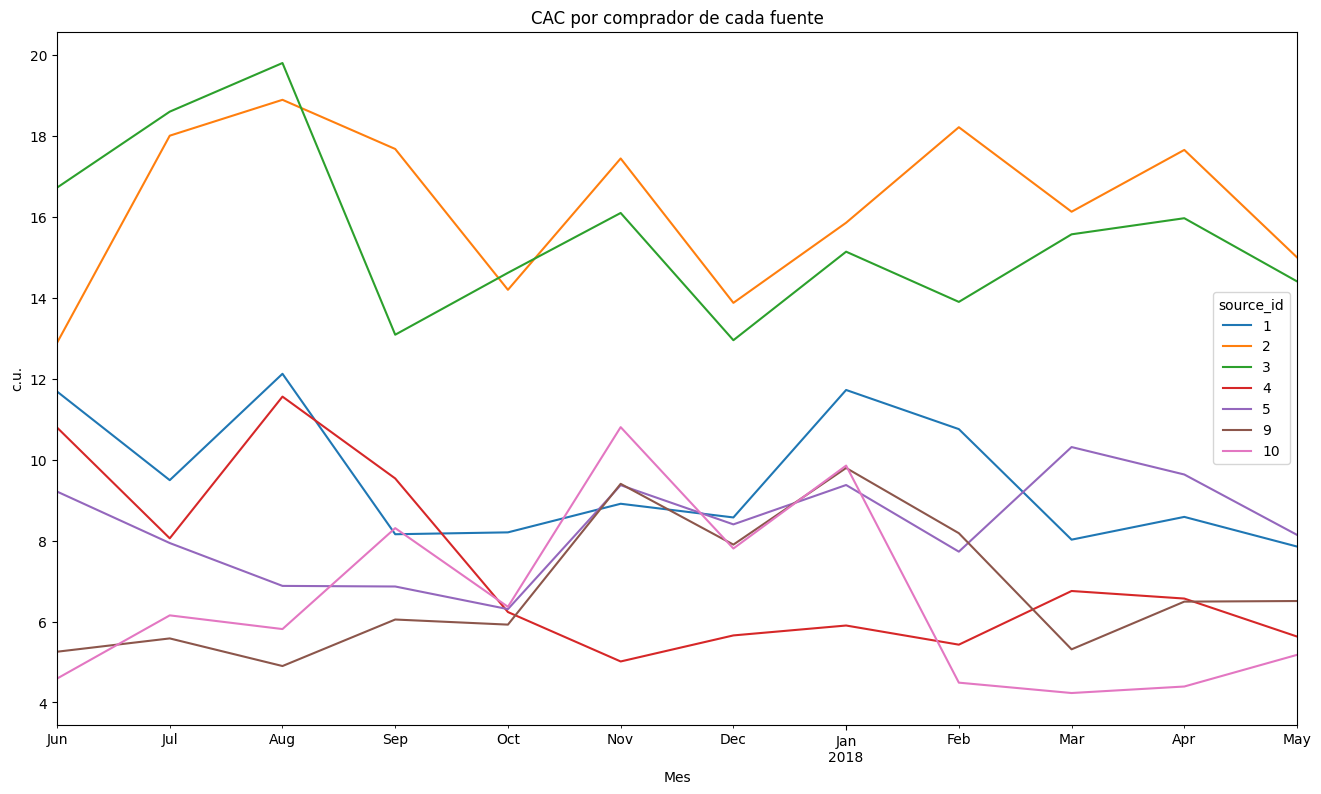

In [50]:
# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['month'], columns='source_id', values='cac', aggfunc='mean').plot(
        figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

In [55]:
# Calcular el CAC promedio por fuente
cac_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2).reset_index()
print(cac_source)

   source_id    cac
0          1   9.49
1          2  16.29
2          3  15.58
3          4   7.27
4          5   8.34
5          9   6.84
6         10   6.56


<AxesSubplot:xlabel='source_id', ylabel='cac'>

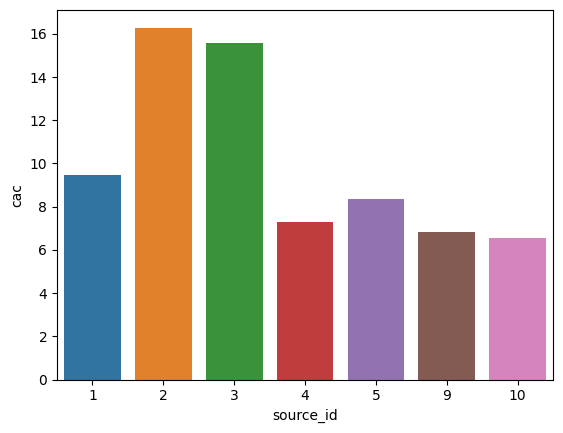

In [56]:
sns.barplot(
    data=cac_source,
    x='source_id',
    y='cac'
)

Aun que la fuente 3 fue en la que mas se gasto la fuente 4 fue la que más clientes atrajo pero no es la que tiene mejor relación costo/beneficio. Entre menor es el CAC (costo de adquisicion de clientes) más efectiva es la fuente, en orden de la más efectiva (según el CAC) a la menos es:  10, 9, 4, 5, 1, 3, y 2 tomando en cuneta esto debería invertirse el dinero en base a esto.

# ¿Cuán rentables eran las inversiones? (ROMI)

In [60]:
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')
buyers.head()

,uid,first_visit_ts,first_visit_dt,first_visit_month,first_order_ts,first_order_dt,first_order_month,source_id,order_month,revenue
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2,2018-01-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,10,2017-06-01,3.05
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,3,2017-10-01,73.33
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,5,2018-01-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,5,2017-11-01,10.99


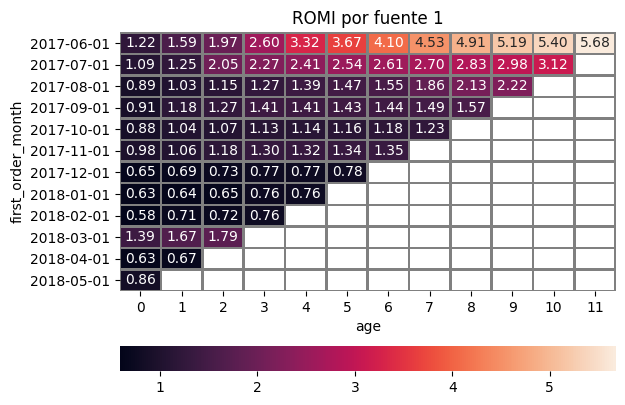

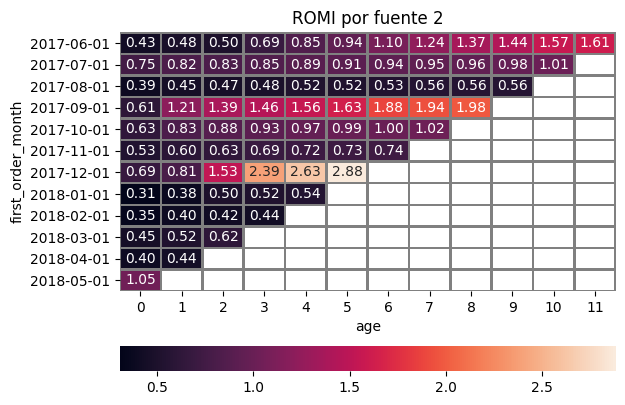

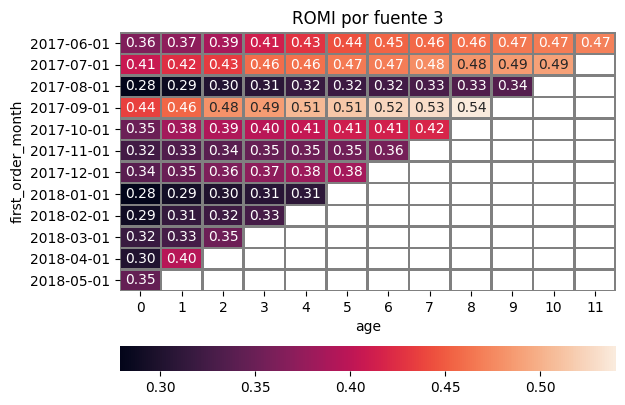

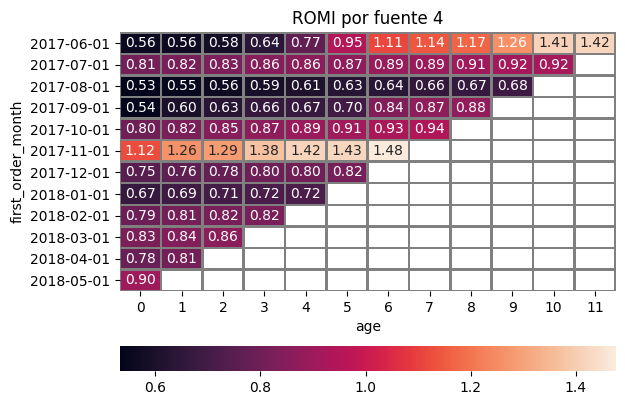

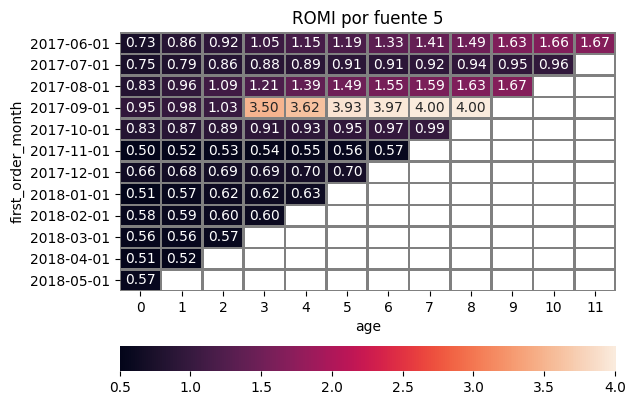

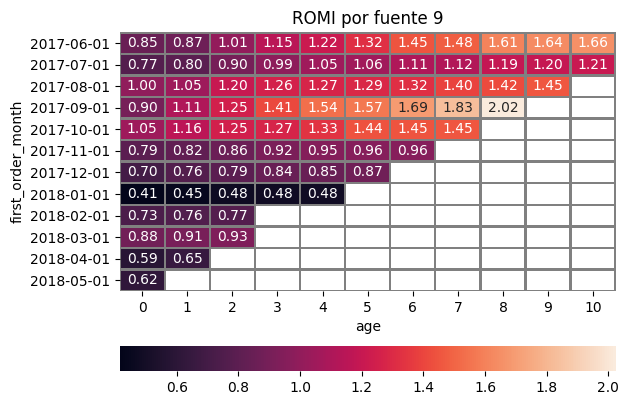

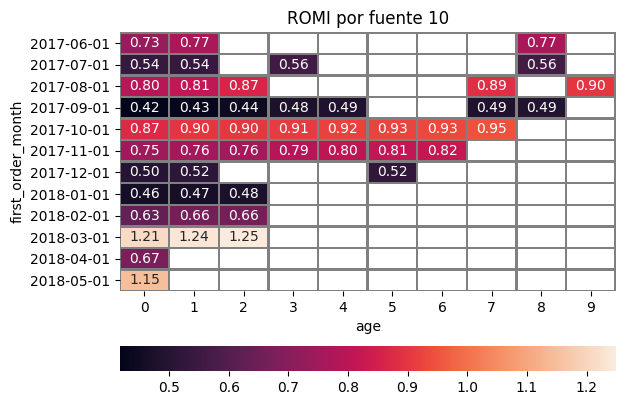

In [63]:
# Iterar a través de cada fuente de tráfico, excepto la fuente número 7 
for source, df in buyers.groupby('source_id'):
    if source != 7:
            # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
            )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

        # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
        report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
        report_romi['age'] = report_romi['age'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        # Calcular costos y CAC para cada cohorte
        report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index(),
                                   left_on=['source_id', 'first_order_month'], right_on=['source_id', 'month'])
        report_romi = report_romi.drop(['month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')

        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                        ).set(title='ROMI por fuente {}'.format(source))
        plt.show()

En promedio las cohortes compensan partir del 8vo mes.

# Conclusión

Las sesiones duran en general un minuto o menos.
La segunda sesión suele darse a los 3 minutos de la primera.

La primera compra del usuario se hace el mismo día de la primera sesión y la gran mayoría en la primera hora.

Durante su primer mes los usuarios suelen comprar mucho después de eso las ventas bajan drásticamente.

El tamaño promedio de compra general es de 5, sin embargo, la cohorte de septiembre en el mes de diciembre tubo unas ganancias increíbles. Pero es la única que se sale tanto del la normar y después se normaliza.

En acuerdo con las compras el LTV de los usuarios es increíble el primer mes después baja.

El aumento en los gastos coincide con el aumento en adquisición de clientes.

A pesar de que la fuente 3 es en la que mas se gasta no es la que más atrae clientes. En orden de la más efectiva (según el CAC) a la menos es:  10, 9, 4, 5, 1, 3, y 2

Los gastos en cada fuente deberían invertirse en base a esto último, dando más presupuesto a las fuentes 9, 10 y 4

Las cohortes de junio y septiembre son las únicas que son rentables hasta donde abarcan los datos, esto es normal en las cohortes más nuevas, y también tiene sentido que la cohorte de septiembre pues tuvo ventas espectaculares en diciembre, También podemos ver que la cohorte de diciembre está cerca de ser rentable pues tuvo ventas notables a partir de febrero.

A pesar de las excepciones en promedio las cohortes alcanzan la rentabilidad a partir del 8vo mes lo cual podría mejorar si se pone el presupuesto en la fuentes mas efectivas para captar clientes.

ROMI:

Fuente 1: la mayoría de las cohortes son rentables a partir del segundo mes.

Fuente 2: en promedio las cohortes empiezan a ser rentables después del 5 mes.

Fuente 3: en la fuente 3 ninguna cohorte llego a ser rentable.

Fuente 4: solo las cohortes de julio y noviembre de 2017 llegaron a ser rentables, la de noviembre fue rentable desde el primer mes.

Fuente 5: en promedio la inversión vale la pena a partir del 4to mes, el cual la cohorte de septiembre tiene un gran aumente.

Fuente 9: al igual que la fuente 5 es rentable a partir de 4 meses, pero aquí esta más equilibrado.

Fuente 10: es difícil sacar información de esta fuente pues hay varios meses en las que no se uso en absoluto. Aun asi podemos ver que las cohortes de marzo y junio de 2018 son rentables desde el primer mes.

Hay que darle mas presupuesto a las fuentes 10, 9, 1 y reducir el presupuesto de la fuente 3 

